#Import Data


In [1]:
#Import Modul

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL mentah dari file CSV di GitHub
url = 'https://raw.githubusercontent.com/antyaalhikmah/UAS_DeepLearning/main/data-labeling.csv'

# Membaca data dari URL
data = pd.read_csv(url)
data

id_           created_at       tweetID  \
0        1  2023-01-01 13:50:44  1.609548e+18   
1        2  2023-01-01 11:00:01  1.609505e+18   
2        3   2023-01-02 9:41:59  1.609847e+18   
3        4   2023-01-03 7:19:49  1.610174e+18   
4        5   2023-01-03 2:29:01  1.610101e+18   
...    ...                  ...           ...   
2119  2120   2024-04-30 1:13:46  1.785115e+18   
2120  2121  2024-04-29 13:30:44  1.784938e+18   
2121  2122  2024-04-30 11:57:00  1.785277e+18   
2122  2123  2024-05-04 12:57:02  1.786742e+18   
2123  2124   2024-04-29 5:26:29  1.784817e+18   

                                                  tweet        username  \
0     Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...    TangselSmkn2   
1     Shin Tae-yong selaku pelatih kepala Timnas Ind...            PSSI   
2     SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   GampongSuzuki   
3     Baru saja mengirim foto @ TOYOTA PERINTIS GATS...  toyotamedan_id   
4     DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...    HoldenKlasik   
...                                                 ...             ...   
2119  Arogansi dari anggota TNI Al Sopir grandmax ca...   never_alonely   
2120  Seserahan lamaran di Kabupaten Pati, Sabtu (27...        kumparan   
2121  Acara lamaran pernikahan di Desa Bermi, Gembon...      tribunnews   
2122        Mbah Gimux (@Luck_Java) on X Vini Vidi Vici       Luck_Java   
2123  Lantas bagaimana penjualan sepeda motor Suzuki...         ipanase   

                   id_str                       name      entity      likes  \
0     1414792059257380864               SMKN2Tangsel    Daihatsu        NaN   
1              2363027508                       PSSI  Mitsubishi  1837302.0   
2               971377286             Gampong Suzuki      Suzuki      140.0   
3               732457105  Toyota Medan 082167506001      Toyota      642.0   
4              1391235014             Suka Mobil Tua         BMW   154655.0   
...                   ...                        ...         ...        ...   
2119  1369949963690549248               NeverAloneLy       Honda    14970.0   
2120   759692754985242625                   kumparan       Honda  1078416.0   
2121            124171593             Tribunnews.com       Honda  1461997.0   
2122   916311246793666566                 Mbah Gimux       Honda        NaN   
2123            100258807                 #PERTAMAX7      Suzuki     2753.0   

      retweets     quotes  replies sentiment Spam Detection  bidang  gender  \
0          NaN        NaN        1    Netral            ham     NaN     NaN   
1        159.0    24686.0       31    Netral            ham     NaN     NaN   
2         72.0     1510.0        0   Positif           spam     NaN     NaN   
3          1.0      757.0        0    Netral           spam     NaN     NaN   
4        402.0    96590.0        1    Netral           spam     NaN     NaN   
...        ...        ...      ...       ...            ...     ...     ...   
2119    2962.0    12081.0       66   Negatif           spam     NaN     NaN   
2120       3.0  1073489.0        0    Netral           spam     NaN     NaN   
2121     537.0   909505.0        2    Netral           spam     NaN     NaN   
2122       NaN        NaN       12    Netral           spam     NaN     NaN   
2123     226.0    48092.0        0    Netral            ham     NaN     NaN   

                                                   link  \
0                      https://twitter.com/TangselSmkn2   
1     https://twitter.com/PSSI/status/16095047120127...   
2     https://twitter.com/GampongSuzuki/status/16098...   
3     https://twitter.com/toyotamedan_id/status/1610...   
4     https://twitter.com/HoldenKlasik/status/161010...   
...                                                 ...   
2119  https://twitter.com/never_alonely/status/17851...   
2120  https://twitter.com/kumparan/status/1784938369...   
2121  https://twitter.com/tribunnews/status/17852771...   
2122                      htt

#Preprocessing

In [3]:
data.shape

(2124, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_             2124 non-null   int64  
 1   created_at      2124 non-null   object 
 2   tweetID         2124 non-null   float64
 3   tweet           2124 non-null   object 
 4   username        2124 non-null   object 
 5   id_str          2124 non-null   int64  
 6   name            2124 non-null   object 
 7   entity          2124 non-null   object 
 8   likes           1602 non-null   float64
 9   retweets        1602 non-null   float64
 10  quotes          1602 non-null   float64
 11  replies         2124 non-null   int64  
 12  sentiment       2124 non-null   object 
 13  Spam Detection  2124 non-null   object 
 14  bidang          0 non-null      float64
 15  gender          0 non-null      float64
 16  link            2124 non-null   object 
 17  imageUrl        2119 non-null   o

In [5]:
# Cek Apakah ada nilai NaN
data.isna().sum()

id_                  0
created_at           0
tweetID              0
tweet                0
username             0
id_str               0
name                 0
entity               0
likes              522
retweets           522
quotes             522
replies              0
sentiment            0
Spam Detection       0
bidang            2124
gender            2124
link                 0
imageUrl             5
dtype: int64

In [6]:
# Cek data tweet yang terduplikasi
data['tweet'].duplicated().sum()

26

In [7]:
# Menghapus data tweet yang terduplikasi
data2 = data.drop_duplicates(subset=['tweet'])
data2.shape

(2098, 18)

In [8]:
# Cek Jumlah Spam Detection
data2['Spam Detection'].value_counts()

Spam Detection
spam    1355
ham      743
Name: count, dtype: int64

In [9]:
# Cek Jumlah Masing-Masing Merek Mobil
data2['entity'].value_counts()

entity
Daihatsu      455
Toyota        455
Suzuki        320
Honda         281
Mitsubishi    232
Wuling        185
Hyundai       144
BMW            11
AUDI            9
Mazda           5
Mercedez        1
Name: count, dtype: int64

In [10]:
# Visualisasi dataset yang diperlukan
data_tweet = pd.DataFrame(data2['tweet'])
data_tweet.head()

tweet
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...
4  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...

##Cleaning

Membersihkan teks dari elemen yang tidak diperlukan, seperti username, emoji, angka, simbol, URL, tag HTML

In [11]:
# Import modul yang diperlukan
import string
import nltk
import re

In [12]:
def remove_URL(tweet): # Menghapus URL
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
                          "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
  tweet = re.sub(r'\d+', '', tweet)
  return tweet

def remove_symbols (tweet): # Menghapus simbol
  tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
  return tweet

# Visualisasi clean dataset 'tweet'
data_tweet['cleaning'] = data_tweet['tweet'].apply(lambda x: remove_URL(x))
data_tweet['cleaning'] = data_tweet['cleaning'].apply(lambda x: remove_html(x))
data_tweet['cleaning'] = data_tweet['cleaning'].apply(lambda x: remove_emoji(x))
data_tweet['cleaning'] = data_tweet['cleaning'].apply(lambda x: remove_username(x))
data_tweet['cleaning'] = data_tweet['cleaning'].apply(lambda x: remove_symbols(x))
data_tweet['cleaning'] = data_tweet['cleaning'].apply(lambda x: remove_numbers(x))

data_tweet.head(10)

tweet  \
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   
5  Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   
6  Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...   
7  Terima kasih kepada 65,147 orang penyokong yan...   
8  ? Pasukan kebangsaan ?? akan bertemu Thailand ...   
9  For Sale Toyota Crown Lele... Custom 2 pintu.....   

                                            cleaning  
0  Hallo sobat Nedutase Lepas Sambut Kepala SMK N...  
1  Shin Taeyong selaku pelatih kepala Timnas Indo...  
2  SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...  
3  Baru saja mengirim foto  TOYOTA PERINTIS GATSU...  
4  DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...  
5  Semifinal AFF Mitsubishi Electric Cup  Timnas ...  
6  Hari Perlawanan   Selasa  Januari  Kumpulan B ...  
7  Terima kasih kepada  orang penyokong yang hadi...  
8   Pasukan kebangsaan  akan bertemu Thailand  pa...  
9  For Sale Toyota Crown Lele Custom  pintu Kondi...

##Case Folding

Mengubah menjadi huruf kecil semua, untuk mengurangi terjadinya variasi kata karena perbedaan huruf besar dan kecil

In [13]:
def case_folding(text): # Mengubah huruf yang masih uppercase menjadi lowercase
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

# Visualisasi Perbandingan dataset
data_tweet['case_folding'] = data_tweet['cleaning'].apply(case_folding)

data_tweet.head(10)

tweet  \
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   
5  Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   
6  Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...   
7  Terima kasih kepada 65,147 orang penyokong yan...   
8  ? Pasukan kebangsaan ?? akan bertemu Thailand ...   
9  For Sale Toyota Crown Lele... Custom 2 pintu.....   

                                            cleaning  \
0  Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1  Shin Taeyong selaku pelatih kepala Timnas Indo...   
2  SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3  Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
4  DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...   
5  Semifinal AFF Mitsubishi Electric Cup  Timnas ...   
6  Hari Perlawanan   Selasa  Januari  Kumpulan B ...   
7  Terima kasih kepada  orang penyokong yang hadi...   
8   Pasukan kebangsaan  akan bertemu Thailand  pa...   
9  For Sale Toyota Crown Lele Custom  pintu Kondi...   

                                        case_folding  
0  hallo sobat nedutase lepas sambut kepala smk n...  
1  shin taeyong selaku pelatih kepala timnas indo...  
2  suzuki xl  jawabannya tampilan eksterior suzuk...  
3  baru saja mengirim foto  toyota perintis gatsu...  
4  dijual bmw e i mesin m plat r pajak on bodi mu...  
5  semifinal aff mitsubishi electric cup  timnas ...  
6  hari perlawanan   selasa  januari  kumpulan b ...  
7  terima kasih kepada  orang penyokong yang hadi...  
8   pasukan kebangsaan  akan bertemu thailand  pa...  
9  for sale toyota crown lele custom  pintu kondi...

##Tokenization

Memecah teks menjadi bagian-bagian yang lebih terstruktur agar memudahkan analisa teks

In [14]:
def tokenize(text):# Fungsi tokenisasi teks
     tokens = text.split()
     return tokens

# Visualisasi Perbandingan dataset
data_tweet['tokenize'] = data_tweet['case_folding'].apply(tokenize)

data_tweet.head(10)

tweet  \
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   
5  Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   
6  Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...   
7  Terima kasih kepada 65,147 orang penyokong yan...   
8  ? Pasukan kebangsaan ?? akan bertemu Thailand ...   
9  For Sale Toyota Crown Lele... Custom 2 pintu.....   

                                            cleaning  \
0  Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1  Shin Taeyong selaku pelatih kepala Timnas Indo...   
2  SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3  Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
4  DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...   
5  Semifinal AFF Mitsubishi Electric Cup  Timnas ...   
6  Hari Perlawanan   Selasa  Januari  Kumpulan B ...   
7  Terima kasih kepada  orang penyokong yang hadi...   
8   Pasukan kebangsaan  akan bertemu Thailand  pa...   
9  For Sale Toyota Crown Lele Custom  pintu Kondi...   

                                        case_folding  \
0  hallo sobat nedutase lepas sambut kepala smk n...   
1  shin taeyong selaku pelatih kepala timnas indo...   
2  suzuki xl  jawabannya tampilan eksterior suzuk...   
3  baru saja mengirim foto  toyota perintis gatsu...   
4  dijual bmw e i mesin m plat r pajak on bodi mu...   
5  semifinal aff mitsubishi electric cup  timnas ...   
6  hari perlawanan   selasa  januari  kumpulan b ...   
7  terima kasih kepada  orang penyokong yang hadi...   
8   pasukan kebangsaan  akan bertemu thailand  pa...   
9  for sale toyota crown lele custom  pintu kondi...   

                                            tokenize  
0  [hallo, sobat, nedutase, lepas, sambut, kepala...  
1  [shin, taeyong, selaku, pelatih, kepala, timna...  
2  [suzuki, xl, jawabannya, tampilan, eksterior, ...  
3  [baru, saja, mengirim, foto, toyota, perintis,...  
4  [dijual, bmw, e, i, mesin, m, plat, r, pajak, ...  
5  [semifinal, aff, mitsubishi, electric, cup, ti...  
6  [hari, perlawanan, selasa, januari, kumpulan, ...  
7  [terima, kasih, kepada, orang, penyokong, yang...  
8  [pasukan, kebangsaan, akan, bertemu, thailand,...  
9  [for, sale, toyota, crown, lele, custom, pintu...

##Stopword Removal

Menghapus kata-kata umum yang sering muncul tetapi tidak bermakna pada analisis teks. Contoh: ke, di, dan, dsb.

In [15]:
# Import modul yang dibutuhkan
import requests
from nltk.corpus import stopwords
nltk.download('stopwords')

# Menghapus stopwords
def remove_stopwords(tokens):
    # Membaca stopwords standar bahasa Indonesia dari NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Fungsi untuk menambahkan stopwords dari URL mentah GitHub
    def add_stopwords_from_url(url):
        response = requests.get(url)
        extra_stopwords = response.text.splitlines()
        stop_words.update(extra_stopwords)

    url = 'https://raw.githubusercontent.com/antyaalhikmah/UAS_DeepLearning/main/id.stopwords.txt'

    # Tambahkan stopwords dari URL mentah
    add_stopwords_from_url(url)

    # Menghapus stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Visualisasi perbandingan dataset
data_tweet['stopword_removal'] = data_tweet['tokenize'].apply(remove_stopwords)
data_tweet.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


tweet  \
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   

                                            cleaning  \
0  Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1  Shin Taeyong selaku pelatih kepala Timnas Indo...   
2  SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3  Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
4  DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...   

                                        case_folding  \
0  hallo sobat nedutase lepas sambut kepala smk n...   
1  shin taeyong selaku pelatih kepala timnas indo...   
2  suzuki xl  jawabannya tampilan eksterior suzuk...   
3  baru saja mengirim foto  toyota perintis gatsu...   
4  dijual bmw e i mesin m plat r pajak on bodi mu...   

                                            tokenize  \
0  [hallo, sobat, nedutase, lepas, sambut, kepala...   
1  [shin, taeyong, selaku, pelatih, kepala, timna...   
2  [suzuki, xl, jawabannya, tampilan, eksterior, ...   
3  [baru, saja, mengirim, foto, toyota, perintis,...   
4  [dijual, bmw, e, i, mesin, m, plat, r, pajak, ...   

                                    stopword_removal  
0  [hallo, sobat, nedutase, lepas, sambut, kepala...  
1  [shin, taeyong, pelatih, kepala, timnas, indon...  
2  [suzuki, xl, jawabannya, tampilan, eksterior, ...  
3  [mengirim, foto, toyota, perintis, gatsu, meda...  
4  [dijual, bmw, e, i, mesin, m, plat, r, pajak, ...

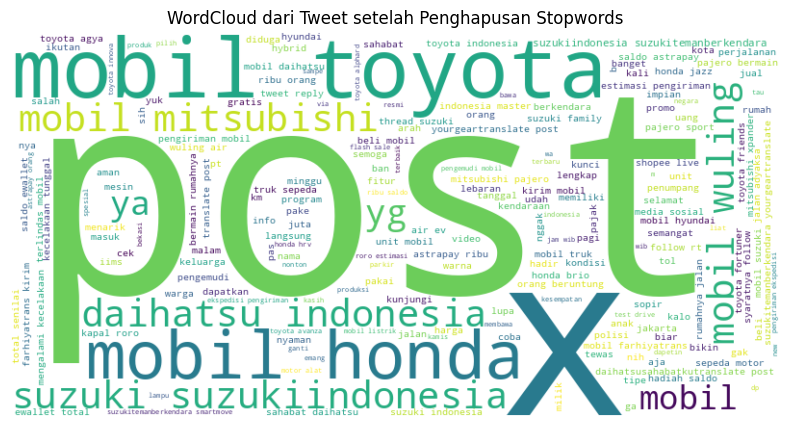

In [16]:
!pip install wordcloud matplotlib

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Gabungkan semua token yang telah difilter menjadi satu string besar
all_words = ' '.join([' '.join(tokens) for tokens in data_tweet['stopword_removal']])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Tweet setelah Penghapusan Stopwords')
plt.show()


##Stemming

Mengubah kata-kata pada teks menjadi bentuk dasar (root form), untuk mengurangi variasi kata dari perubahan bentuk yang berbeda sehingga kata-kata dengan makna yang sama dianggap entitas yang sama. Misalnya, "berjalan", "jalan-jalan", "jalan", dan "pejalan" semuanya direduksi menjadi "jalan"

In [17]:
# Install dan Import modul yang diperlukan
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.1 MB/s eta 0:00:00


In [18]:
# Membuat instance dari StemmerFactory
factory = StemmerFactory()

# Membuat instance stemmer menggunakan factory
stemmer = factory.create_stemmer()

# Mendefinisikan fungsi stem_text untuk melakukan stemming pada teks input
def stem_text(text):
    return [stemmer.stem(word) for word in text]

In [19]:
# Visualisasi perbandingan dataset
data_tweet['stemming'] = data_tweet['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
data_tweet.head(10)

tweet  \
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   
5  Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   
6  Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...   
7  Terima kasih kepada 65,147 orang penyokong yan...   
8  ? Pasukan kebangsaan ?? akan bertemu Thailand ...   
9  For Sale Toyota Crown Lele... Custom 2 pintu.....   

                                            cleaning  \
0  Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1  Shin Taeyong selaku pelatih kepala Timnas Indo...   
2  SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3  Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
4  DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...   
5  Semifinal AFF Mitsubishi Electric Cup  Timnas ...   
6  Hari Perlawanan   Selasa  Januari  Kumpulan B ...   
7  Terima kasih kepada  orang penyokong yang hadi...   
8   Pasukan kebangsaan  akan bertemu Thailand  pa...   
9  For Sale Toyota Crown Lele Custom  pintu Kondi...   

                                        case_folding  \
0  hallo sobat nedutase lepas sambut kepala smk n...   
1  shin taeyong selaku pelatih kepala timnas indo...   
2  suzuki xl  jawabannya tampilan eksterior suzuk...   
3  baru saja mengirim foto  toyota perintis gatsu...   
4  dijual bmw e i mesin m plat r pajak on bodi mu...   
5  semifinal aff mitsubishi electric cup  timnas ...   
6  hari perlawanan   selasa  januari  kumpulan b ...   
7  terima kasih kepada  orang penyokong yang hadi...   
8   pasukan kebangsaan  akan bertemu thailand  pa...   
9  for sale toyota crown lele custom  pintu kondi...   

                                            tokenize  \
0  [hallo, sobat, nedutase, lepas, sambut, kepala...   
1  [shin, taeyong, selaku, pelatih, kepala, timna...   
2  [suzuki, xl, jawabannya, tampilan, eksterior, ...   
3  [baru, saja, mengirim, foto, toyota, perintis,...   
4  [dijual, bmw, e, i, mesin, m, plat, r, pajak, ...   
5  [semifinal, aff, mitsubishi, electric, cup, ti...   
6  [hari, perlawanan, selasa, januari, kumpulan, ...   
7  [terima, kasih, kepada, orang, penyokong, yang...   
8  [pasukan, kebangsaan, akan, bertemu, thailand,...   
9  [for, sale, toyota, crown, lele, custom, pintu...   

                                    stopword_removal  \
0  [hallo, sobat, nedutase, lepas, sambut, kepala...   
1  [shin, taeyong, pelatih, kepala, timnas, indon...   
2  [suzuki, xl, jawabannya, tampilan, eksterior, ...   
3  [mengirim, foto, toyota, perintis, gatsu, meda...   
4  [dijual, bmw, e, i, mesin, m, plat, r, pajak, ...   
5  [semifinal, aff, mitsubishi, electric, cup, ti...   
6  [perlawanan, selasa, januari, kumpulan, b, pia...   
7  [terima, kasih, orang, penyokong, hadir, menya...   
8  [pasukan, kebangsaan, bertemu, thailand, aksi,...   
9  [for, sale, toyota, crown, lele, custom, pintu...   

                                            stemming  
0  hallo sobat nedutase lepas sambut kepala smk n...  
1  shin taeyong latih kepala timnas indonesia dam...  
2  suzuki xl jawab tampil eksterior suzuki xl tam...  
3  kirim foto toyota rintis gatsu medantranslate ...  
4  jual bmw e i mesin m plat r pajak on bodi mulu...  
5  semifinal aff mitsubishi electric cup timnas i...  
6  lawan selasa januari kumpul b piala mitsubishi...  
7  terima kasih orang sokong hadir saksi aksi kum...  
8  pasu bangsa temu thailand aksi timbal peringka...  
9  for sale toyota crown lele custom pintu kondis...

In [20]:
df = data_tweet.copy()  # Menyalin df_tweet untuk membuat dfEDA
df['entity'] = data['entity']
df['Spam Detection'] = data['Spam Detection']
df.head(10)

tweet  \
0  Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...   
1  Shin Tae-yong selaku pelatih kepala Timnas Ind...   
2  SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...   
3  Baru saja mengirim foto @ TOYOTA PERINTIS GATS...   
4  DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...   
5  Semifinal AFF Mitsubishi Electric Cup 2022 Tim...   
6  Hari Perlawanan 5 | Selasa, 3 Januari 2023 Kum...   
7  Terima kasih kepada 65,147 orang penyokong yan...   
8  ? Pasukan kebangsaan ?? akan bertemu Thailand ...   
9  For Sale Toyota Crown Lele... Custom 2 pintu.....   

                                            cleaning  \
0  Hallo sobat Nedutase Lepas Sambut Kepala SMK N...   
1  Shin Taeyong selaku pelatih kepala Timnas Indo...   
2  SUZUKI XL  Jawabannya Tampilan eksterior Suzuk...   
3  Baru saja mengirim foto  TOYOTA PERINTIS GATSU...   
4  DIJUAL BMW E i Mesin M Plat R Pajak On Bodi mu...   
5  Semifinal AFF Mitsubishi Electric Cup  Timnas ...   
6  Hari Perlawanan   Selasa  Januari  Kumpulan B ...   
7  Terima kasih kepada  orang penyokong yang hadi...   
8   Pasukan kebangsaan  akan bertemu Thailand  pa...   
9  For Sale Toyota Crown Lele Custom  pintu Kondi...   

                                        case_folding  \
0  hallo sobat nedutase lepas sambut kepala smk n...   
1  shin taeyong selaku pelatih kepala timnas indo...   
2  suzuki xl  jawabannya tampilan eksterior suzuk...   
3  baru saja mengirim foto  toyota perintis gatsu...   
4  dijual bmw e i mesin m plat r pajak on bodi mu...   
5  semifinal aff mitsubishi electric cup  timnas ...   
6  hari perlawanan   selasa  januari  kumpulan b ...   
7  terima kasih kepada  orang penyokong yang hadi...   
8   pasukan kebangsaan  akan bertemu thailand  pa...   
9  for sale toyota crown lele custom  pintu kondi...   

                                            tokenize  \
0  [hallo, sobat, nedutase, lepas, sambut, kepala...   
1  [shin, taeyong, selaku, pelatih, kepala, timna...   
2  [suzuki, xl, jawabannya, tampilan, eksterior, ...   
3  [baru, saja, mengirim, foto, toyota, perintis,...   
4  [dijual, bmw, e, i, mesin, m, plat, r, pajak, ...   
5  [semifinal, aff, mitsubishi, electric, cup, ti...   
6  [hari, perlawanan, selasa, januari, kumpulan, ...   
7  [terima, kasih, kepada, orang, penyokong, yang...   
8  [pasukan, kebangsaan, akan, bertemu, thailand,...   
9  [for, sale, toyota, crown, lele, custom, pintu...   

                                    stopword_removal  \
0  [hallo, sobat, nedutase, lepas, sambut, kepala...   
1  [shin, taeyong, pelatih, kepala, timnas, indon...   
2  [suzuki, xl, jawabannya, tampilan, eksterior, ...   
3  [mengirim, foto, toyota, perintis, gatsu, meda...   
4  [dijual, bmw, e, i, mesin, m, plat, r, pajak, ...   
5  [semifinal, aff, mitsubishi, electric, cup, ti...   
6  [perlawanan, selasa, januari, kumpulan, b, pia...   
7  [terima, kasih, orang, penyokong, hadir, menya...   
8  [pasukan, kebangsaan, bertemu, thailand, aksi,...   
9  [for, sale, toyota, crown, lele, custom, pintu...   

                                            stemming      entity  \
0  hallo sobat nedutase lepas sambut kepala smk n...    Daihatsu   
1  shin taeyong latih kepala timnas indonesia dam...  Mitsubishi   
2  suzuki xl jawab tampil eksterior suzuki xl tam...      Suzuki   
3  kirim foto toyota rintis gatsu medantranslate ...      Toyota   
4  jual bmw e i mesin m plat r pajak on bodi mulu...         BMW   
5  semifinal aff mitsubishi electric cup timnas i...  Mitsubishi   
6  lawan selasa januari kumpul b piala mitsubishi...  Mitsubishi   
7  terima kasih orang sokong hadir saksi aksi kum...  Mitsubishi   
8  pasu bangsa temu thailand aksi timbal peringka...  Mitsubishi   
9  for sale toyota crown lele custom pintu kondis...      Toyota   

  Spam Detection  
0            ham  
1            ham  
2           spam  
3           spam  
4           spam  
5            ham  
6           spam  
7            ham  
8           spam  
9            ham

In [40]:
#save data setelah di EDA
df.to_csv('Data-EDA.csv',encoding='utf8',index=False)

#EDA

##Data Visualization

In [21]:
#frekuensi spam detection
df['Spam Detection'].value_counts()

Spam Detection
spam    1355
ham      743
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

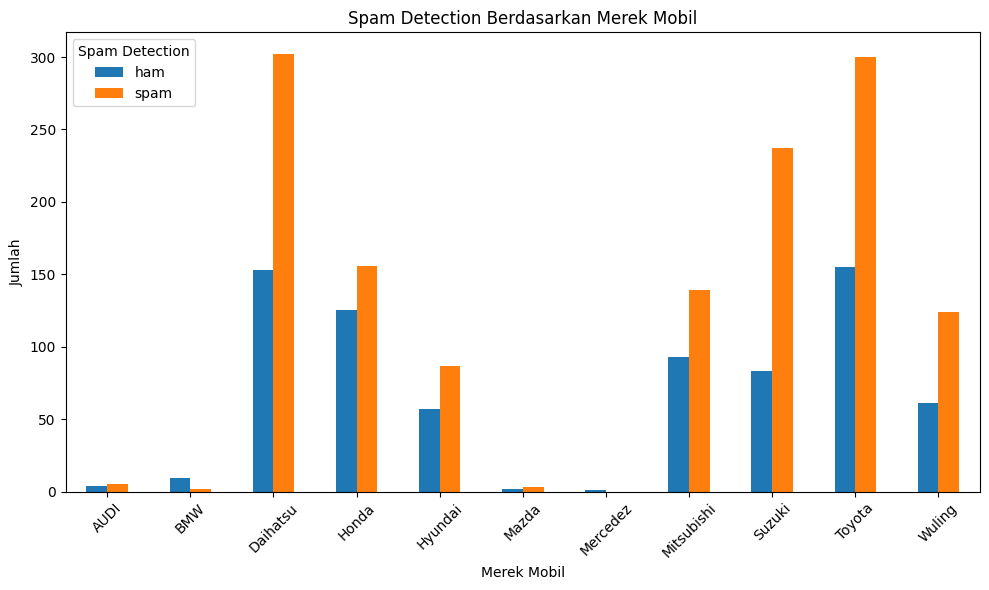

In [22]:
# Menghitung jumlah sentimen per entitas
sentiment_count = df.groupby(['entity', 'Spam Detection']).size().unstack(fill_value=0)

# Membuat plot
plt.figure(figsize=(10, 6))

# Plotting
sentiment_count.plot(kind='bar', figsize=(10, 6))

plt.title('Spam Detection Berdasarkan Merek Mobil')
plt.xlabel('Merek Mobil')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Spam Detection')
plt.tight_layout()

# Menampilkan plot
plt.show()

Grafik di atas menunjukkan deteksi spam berdasrkan merek mobil dengan dua kategori yaitu spam, dan ham (non-spam).
*   Jumlah pesan spam yaitu 1355, lebih
banyak dibandingkan dengan jumlah pesan ham yaitu 743.
*   Merek Daihatsu, Toyota, dan Suzuki  memiliki jumlah pesan spam tertinggi.
*   Beberapa merek seperti Audi, BMW, Mazda, dan Mercedes memiliki jumlah pesan yang sangat rendah, baik untuk spam maupun ham.
*   Deteksi spam bervariasi cukup signifikan antara merek-merek mobil, dengan beberapa merek seperti Daihatsu dan Toyota memiliki tingkat spam yang jauh lebih tinggi.

In [23]:
!pip install nltk
import nltk
nltk.download('punkt')

# Import Modul yang dibutuhkan
from nltk.util import ngrams
from collections import Counter
import nltk # Import nltk

def get_ngrams(text, n):
    tokens = nltk.word_tokenize(text.lower())
    n_grams = ngrams(tokens, n)
    return n_grams

def get_ngram_frequencies(df, n):
    all_ngrams = []
    # Assuming 'Tweet' is the column containing the text data
    for text in df['tweet']: # Replace 'Tweet' with the actual column name if it's different
        ngrams = get_ngrams(text, n)
        all_ngrams.extend(ngrams)
    return Counter(all_ngrams)

# Menghitung unigram, bigram, dan trigram
unigram_freq = get_ngram_frequencies(df, 1)
bigram_freq = get_ngram_frequencies(df, 2)
trigram_freq = get_ngram_frequencies(df, 3)

print("Unigram Frequencies:")
print(unigram_freq.most_common(10))  # Menampilkan 10 unigram teratas

print("\nBigram Frequencies:")
print(bigram_freq.most_common(10))  # Menampilkan 10 bigram teratas

print("\nTrigram Frequencies:")
print(trigram_freq.most_common(10))  # Menampilkan 10 trigram teratas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Unigram Frequencies:
[((',',), 2153), (('.',), 1347), (('mobil',), 1275), (('?',), 1268), (('#',), 1168), (('di',), 1006), (('...',), 941), (('yang',), 841), (('post',), 704), (('!',), 651)]

Bigram Frequencies:
[(('?', '?'), 422), (('(', '@'), 264), ((')', 'on'), 250), (('on', 'x'), 250), (('mobil', 'toyota'), 227), (('mobil', 'honda'), 176), (('https', ':'), 162), (('translate', 'post'), 127), (('#', 'suzuki'), 124), (('suzuki', '#'), 121)]

Trigram Frequencies:
[(('?', '?', '?'), 257), ((')', 'on', 'x'), 250), (('#', 'suzuki', '#'), 121), (('suzuki', '#', 'suzukiindonesia'), 117), (('#', 'suzukiindonesia', '#'), 109), (('suzukiindonesia', '#', 'suzukitemanberkendara'), 87), (('#', 'suzukitemanberkendara', '#'), 82), (('.', '·', '.'), 79), (('?', 'translate', 'post'), 73), (('(', '@', ')'), 67)]


Output diatas untuk menunjukkan frekuensi unigram, bigram, serta trigram yang juga dapat digunakan untuk mendeteksi spam
*  Banyak tweet yang menyebutkan merek mobil, khususnya Toyota, Honda, dan Suzuki.
*   Penggunaan hashtag dan mention akun cukup tinggi dalam tweet-tweet ini.
*   Ada banyak penggunaan tanda baca seperti koma, titik, tanda tanya, dan tanda seru, menunjukkan beragamnya gaya penulisan dan emosi dalam tweet.
*  Beberapa pola menunjukkan penggunaan fitur terjemahan atau kampanye khusus, terutama yang terkait dengan merek Suzuki.





<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)
<ipython-input-24-534b78f6c817>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stemming'] = df_spam['stemming'].astype(str)


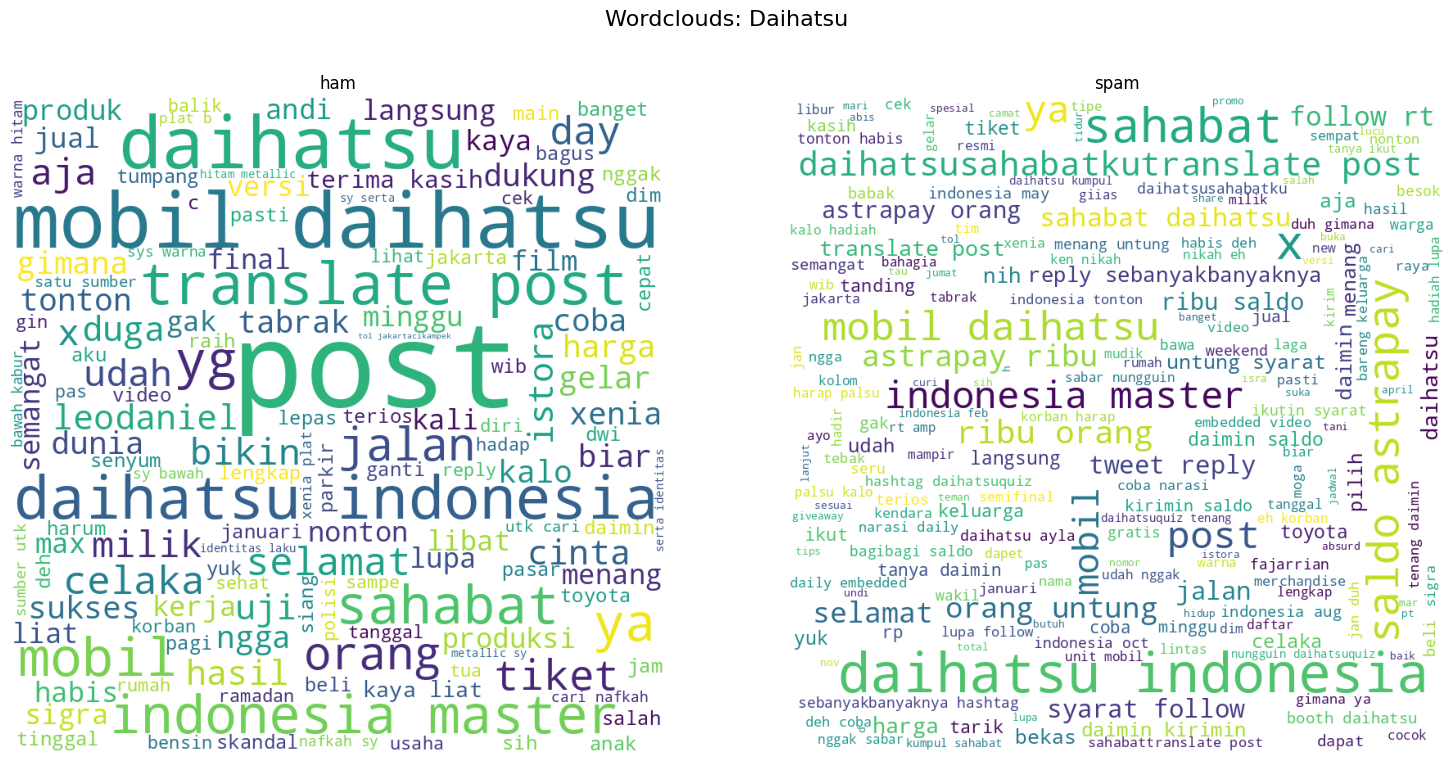

<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)
<ipython-input-24-534b78f6c817>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stemming'] = df_spam['stemming'].astype(str)


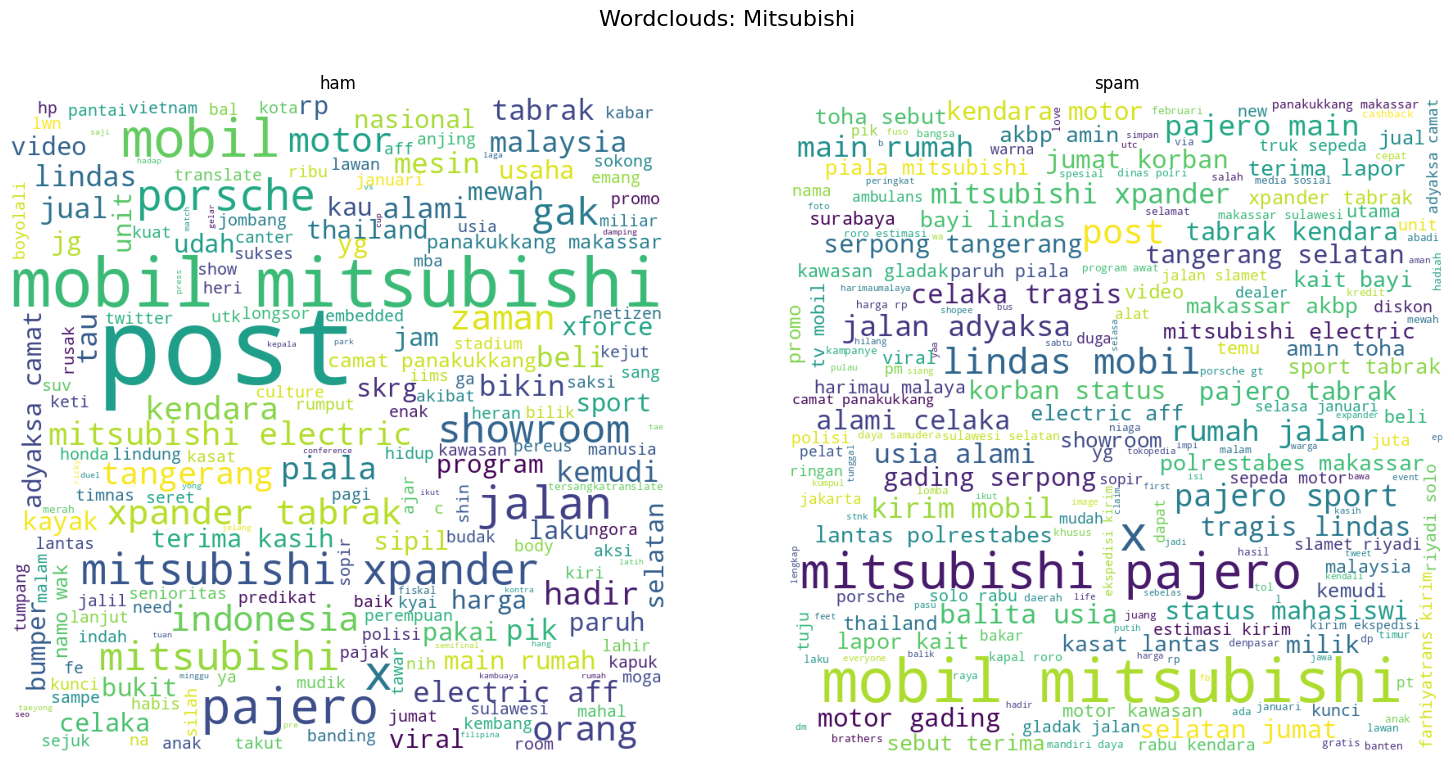

<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)
<ipython-input-24-534b78f6c817>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stemming'] = df_spam['stemming'].astype(str)


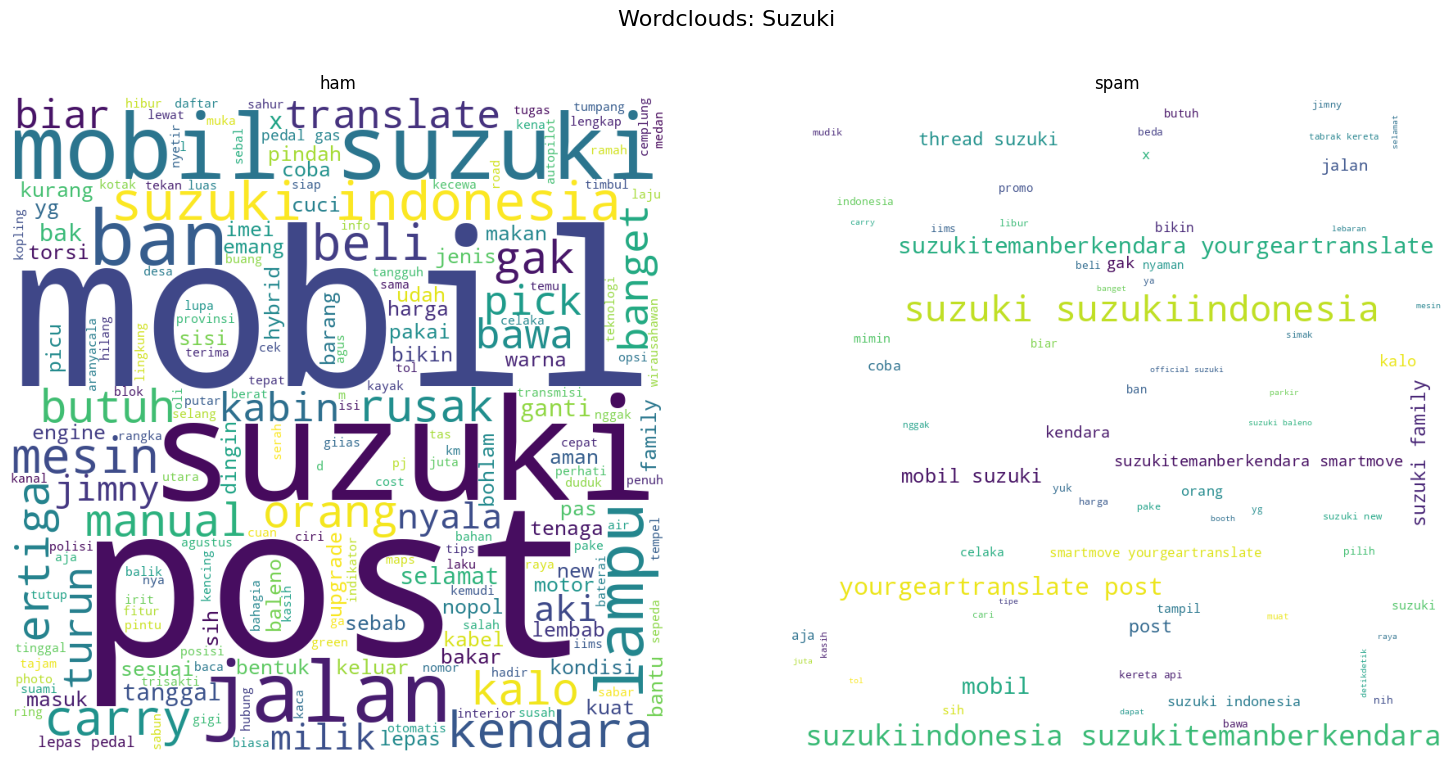

<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)
<ipython-input-24-534b78f6c817>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stemming'] = df_spam['stemming'].astype(str)


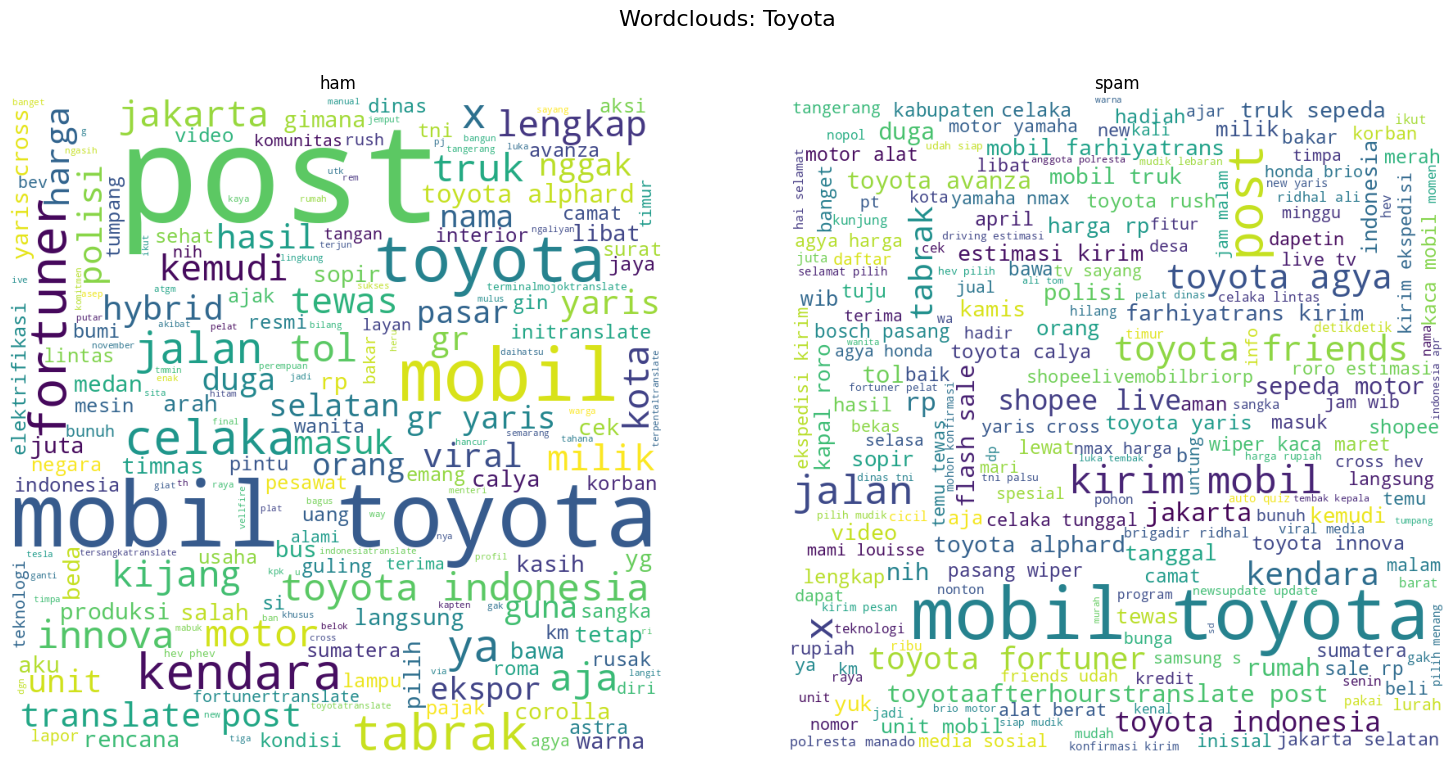

<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)
<ipython-input-24-534b78f6c817>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stemming'] = df_spam['stemming'].astype(str)


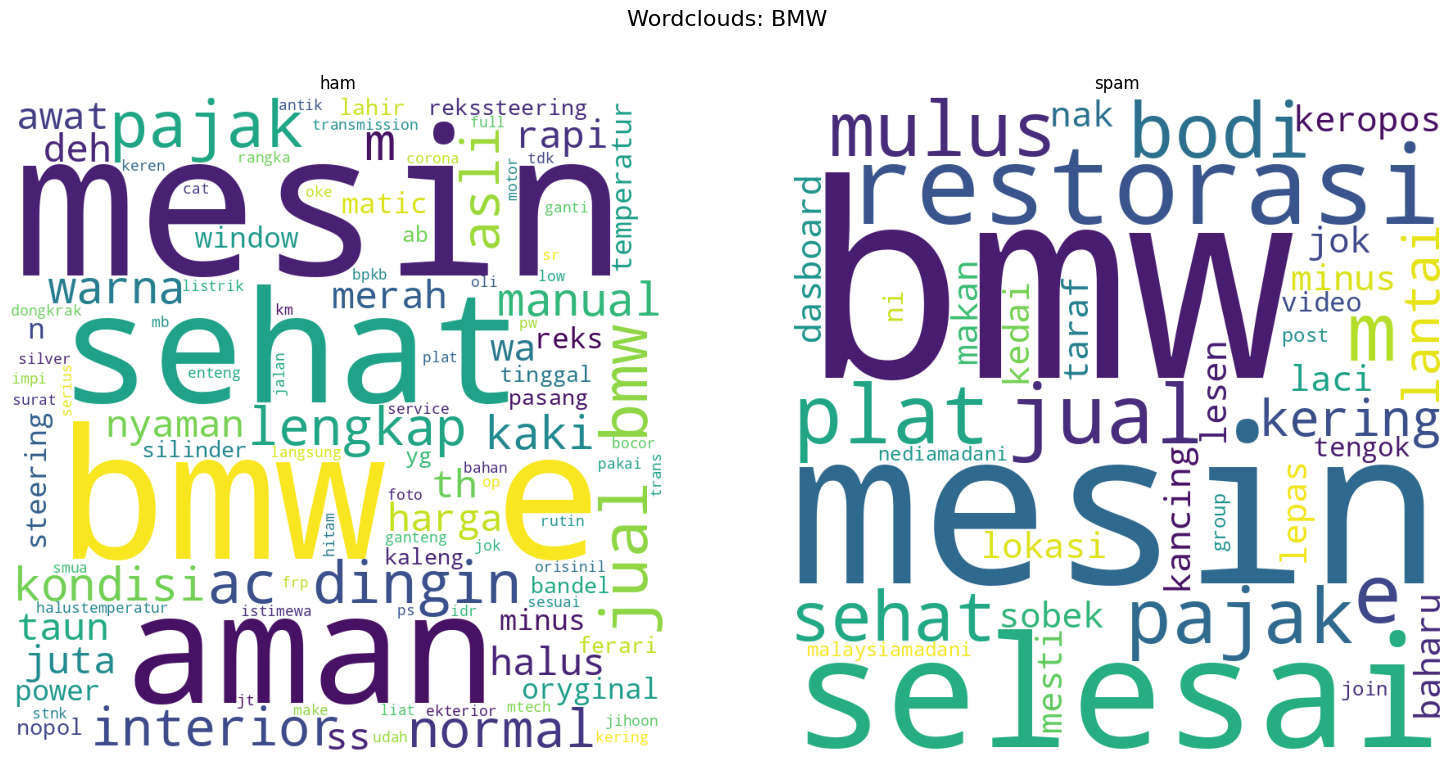

<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)
<ipython-input-24-534b78f6c817>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stemming'] = df_spam['stemming'].astype(str)


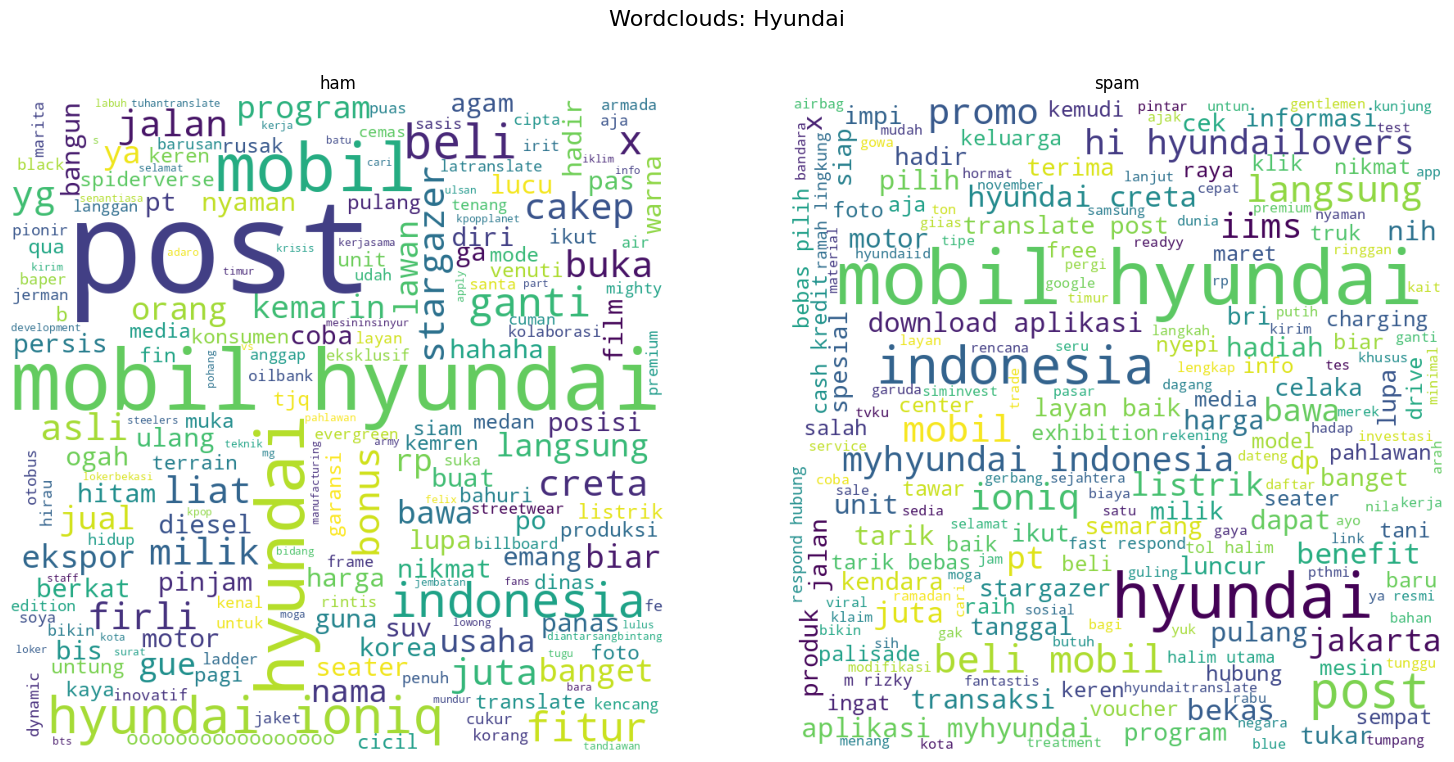

<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)
<ipython-input-24-534b78f6c817>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stemming'] = df_spam['stemming'].astype(str)


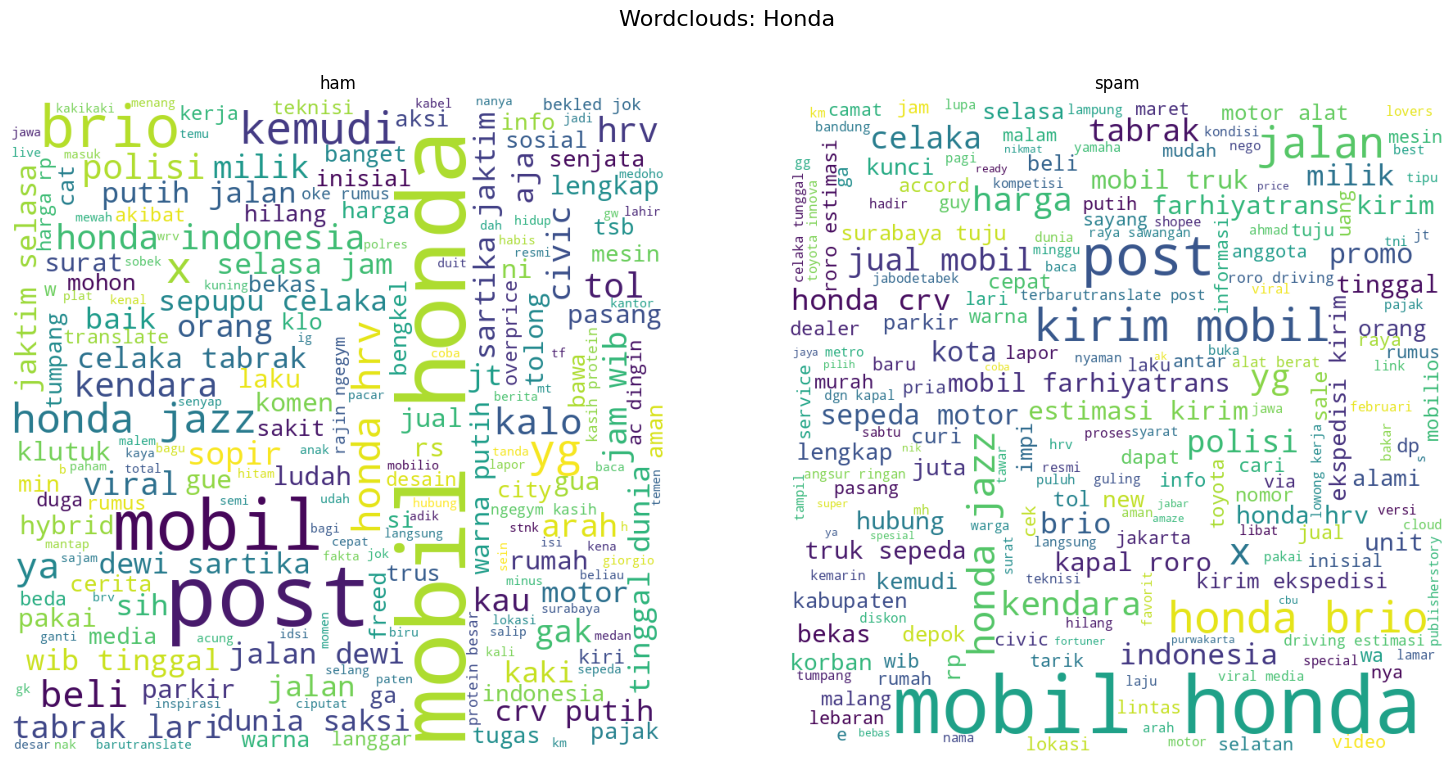

<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)
<ipython-input-24-534b78f6c817>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stemming'] = df_spam['stemming'].astype(str)


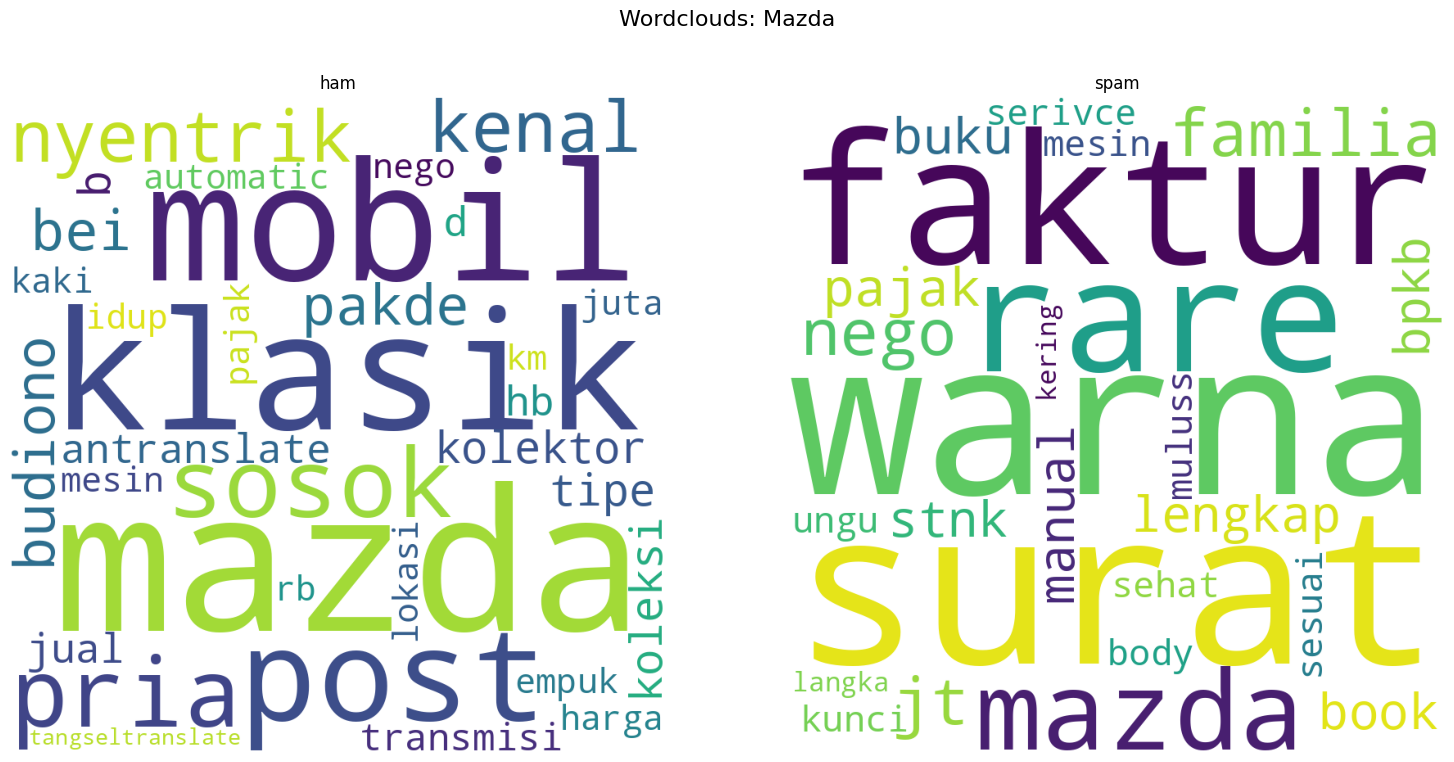

<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)
<ipython-input-24-534b78f6c817>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stemming'] = df_spam['stemming'].astype(str)


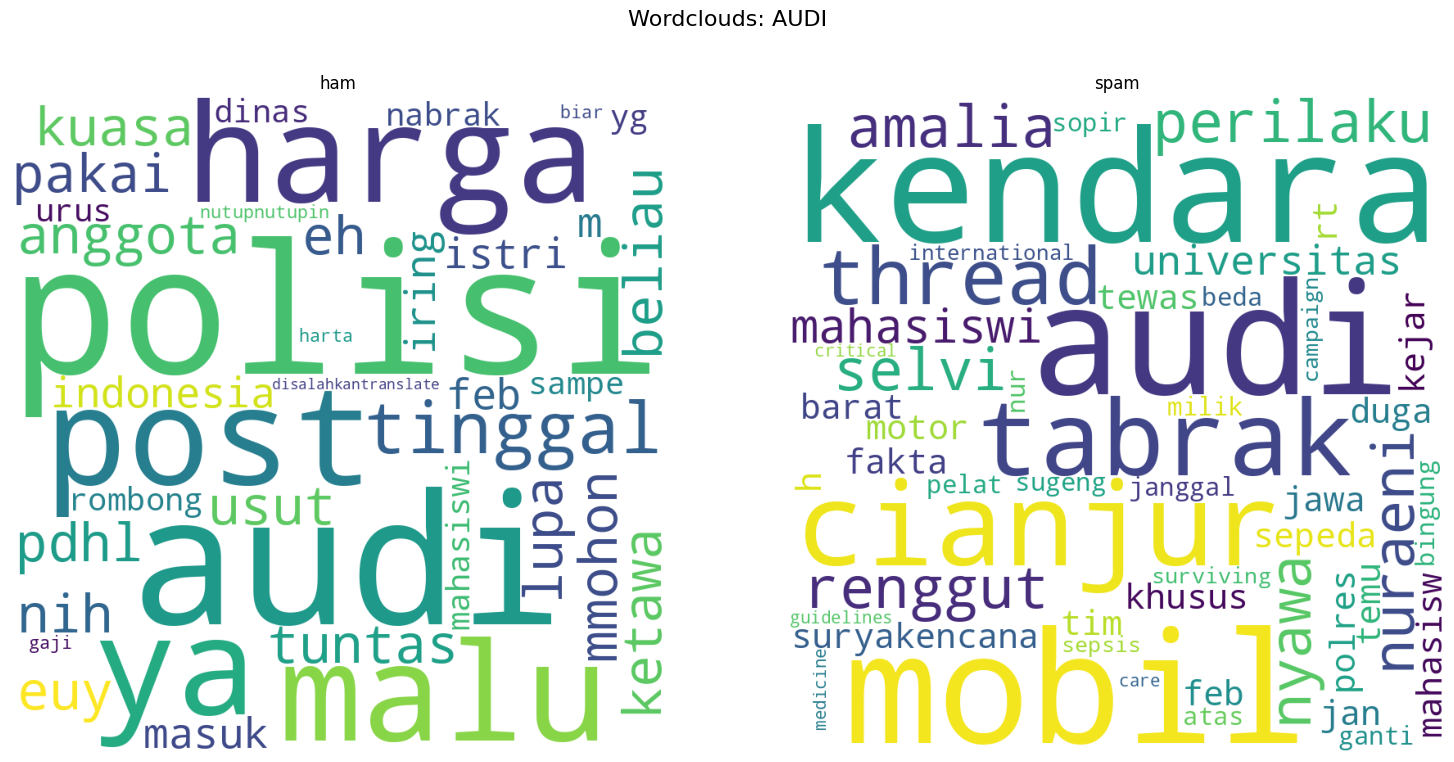

<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)
<ipython-input-24-534b78f6c817>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stemming'] = df_spam['stemming'].astype(str)


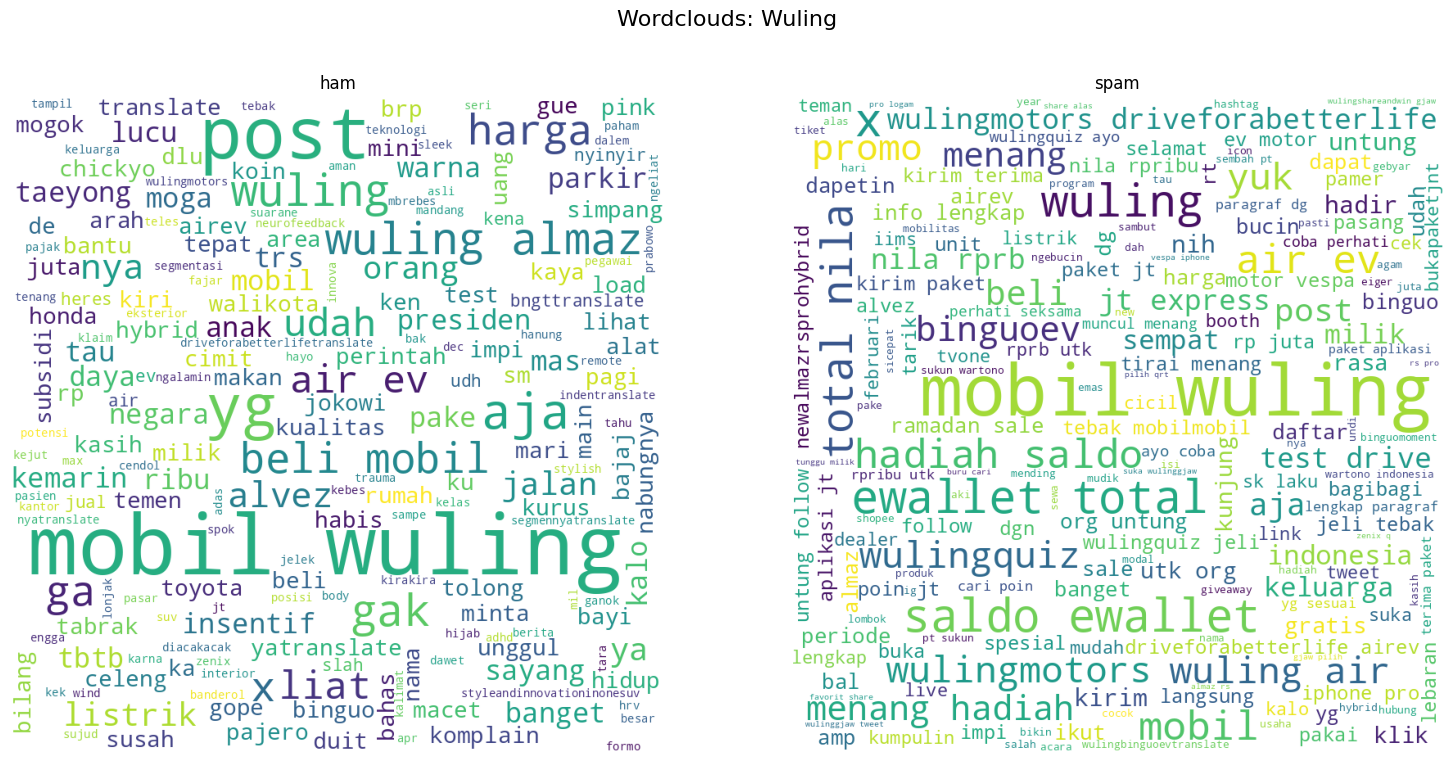

<ipython-input-24-534b78f6c817>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stemming'] = df_ham['stemming'].astype(str)


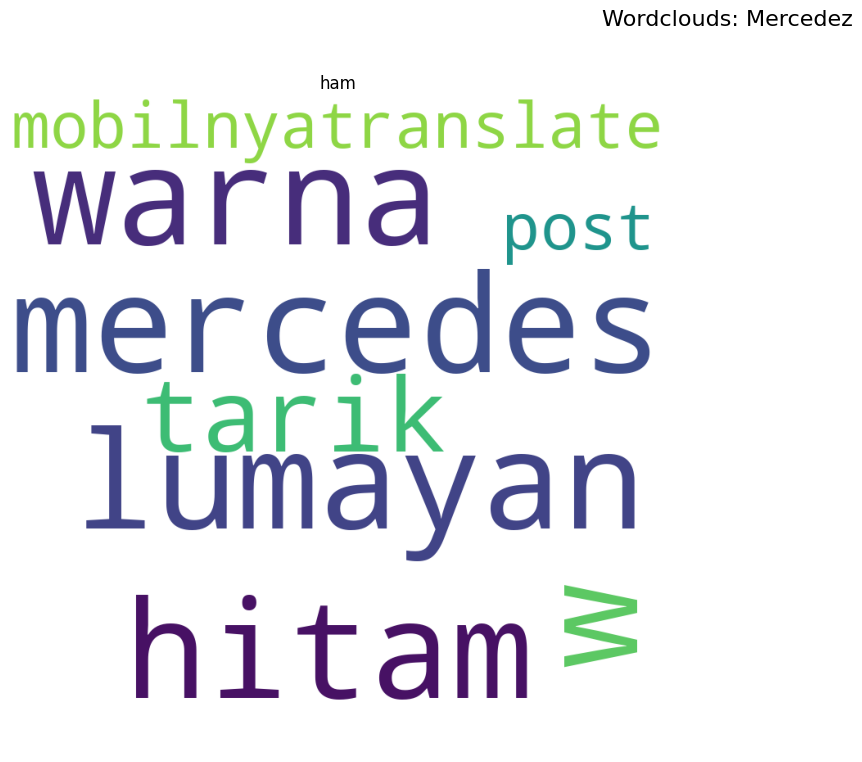

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Get unique entities
entities = df['entity'].unique()

# Create wordclouds for each entity and sentiment
for entity in entities:
    # Filter DataFrame for entity and sentiments
    df_ham = df[(df['entity'] == entity) & (df['Spam Detection'] == 'ham')]
    df_spam = df[(df['entity'] == entity) & (df['Spam Detection'] == 'spam')]

    # Convert 'stemming' column to strings
    df_ham['stemming'] = df_ham['stemming'].astype(str)
    df_spam['stemming'] = df_spam['stemming'].astype(str)

    # Create text for wordclouds if there are words, otherwise set to None to skip
    text_ham = ' '.join(df_ham['stemming']) if not df_ham.empty else None
    text_spam = ' '.join(df_spam['stemming']) if not df_spam.empty else None

    # Create wordclouds if text is not None
    stopwords = set(STOPWORDS)
    if text_ham:
        wordcloud_ham = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(text_ham)
    if text_spam:
        wordcloud_spam = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(text_spam)

    # Plot wordclouds if they were generated
    plt.figure(figsize=(16, 8), facecolor=None)
    plt.suptitle(f"Wordclouds: {entity}", fontsize=16)

    if text_ham:
        plt.subplot(1, 2, 1)
        plt.imshow(wordcloud_ham)
        plt.axis("off")
        plt.title("ham")

    if text_spam:
        plt.subplot(1, 2, 2)
        plt.imshow(wordcloud_spam)
        plt.axis("off")
        plt.title("spam")

    plt.tight_layout(pad=3.0)
    plt.show()

1. Daihatsu
* spam : "saldo", "astrapay", "sahabat", "daihatsu", "indonesia"

Pesan spam pada daihatsu banyak membahas terkait sayembara, promosi, serta pesan berulang terkait daihatsu indonesia

* ham : "daihatsu", "indonesia", "post", "produk", "master"

Pesan ham pada daihatsu banyak membahas terkait daihatsu indonesia itu sendiri tetapi yang benar adanya membahas produk, fitur dll


2. Mitsubishi
* spam : "pajero", "mitsubishi", "lindas", "celaka", "tragis"

Pesan spam pada mitsubishi banyak membahas terkait berita kecelakaan atau kasus yang lumayan banyak berkaitan dengan merek mobil mitsubishi itu sendiri, dan pesan tersebut dikirim dengan akun berita yang berbeda berulang kali

* ham : "mitsubishi", "mobil", "post", "xpander", "harga"

Pesan ham pada mitsubishi banyak membahas terkait merek mobil mitsubishi, harga, fitur, yang bukan berasal dari admin atau buzzer

3. Suzuki
* spam : "suzukitemanberkendara", "smartmove", "thread", "spam", "yourgeartranslate"

Pesan spam pada suzuki banyak dari akun suzuki itu sendiri terkait hashtag yang suzuki punya, biasanya berhubungan dengan promo atau sayembara

* ham : "mobil", "suzuki", "post", "ban", "beli", "mesin"

Pesan spam pada suzuki banyak membahas terkait fitur, harga dari produk mobil suzuki itu sendiri

4. Toyota
* spam : "shopee", "live", "flash", "sale", "mobil", "celaka"

Pesan spam pada toyota banyak membahas terkait sayembara, promosi, kecelakaan yang berhubungan dengan merek toyota

* ham : "harga", "lengkap", "kendara", "produk", "master"

Pesan ham pada daihatsu banyak membahas terkait toyota  itu sendiri tetapi yang benar adanya membahas produk, fitur dll


#Modelling LSTM

In [26]:
#import modul yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

In [27]:
from sklearn.utils import resample

# Menghitung jumlah data 'Spam'
ham_count = df[df['Spam Detection'] == 'ham'].shape[0]

# Melakukan undersampling pada data 'Ham' agar jumlahnya sama dengan jumlah data 'Spam'
spam_undersampled = resample(df[df['Spam Detection'] == 'spam'],
                            replace=False, # Allow sampling with replacement
                            n_samples=ham_count,
                            random_state=42)

# Menggabungkan data hasil undersampling 'Ham' dengan data asli 'Spam'
df_undersampled = pd.concat([spam_undersampled, df[df['Spam Detection'] == 'ham']])

# Mengacak DataFrame
df_undersampled = df_undersampled.sample(frac=1, random_state=42)

df_undersampled['Spam Detection'].value_counts()

Spam Detection
ham     743
spam    743
Name: count, dtype: int64

In [28]:
data_model = df_undersampled[['stemming', 'Spam Detection']]
data_model.head()

stemming Spam Detection
1495  metode manual cuci mobil manual pompa tekan op...            ham
256   hidup kadang kayak angrybird kalo gagal aja ba...            ham
2067  jurnalis media massa nasional ajak duta dubes ...           spam
1651  riah ramadan wulingmotors gelar pamer ramadan ...           spam
1912  mobil daihatsu terios perosok jalur jalan tol ...           spam

In [29]:
# Convert sentiment labels to numeric values
label_encoder = LabelEncoder()
data_model['Spam Detection'] = label_encoder.fit_transform(data_model['Spam Detection'])

<ipython-input-29-74abd295a91f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['Spam Detection'] = label_encoder.fit_transform(data_model['Spam Detection'])


In [30]:
# Splitting the data into train and test sets with a ratio of 80:20
train_data, test_data = train_test_split(data_model, test_size=0.2, random_state=1507)

In [31]:
# Define a custom dataset
class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        tokens = self.tokenizer.encode(text, add_special_tokens=True)
        return torch.tensor(tokens), torch.tensor(label)

In [32]:
# Tokenize and create DataLoader
def collate_fn(batch):
    texts, labels = zip(*batch)
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=0)
    labels = torch.tensor(labels)
    return texts_padded, labels

# Create datasets
train_dataset = TweetDataset(train_data['stemming'], train_data['Spam Detection'])
test_dataset = TweetDataset(test_data['stemming'], test_data['Spam Detection'])

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [33]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.num_layers = num_layers # store num_layers as an attribute
        self.hidden_size = hidden_size # store hidden_size as an attribute

    def forward(self, x):
        x = self.embedding(x)
        # Initialize hidden state with correct shape
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])
        return out

In [34]:
# Hyperparameters
vocab_size = len(BertTokenizer.from_pretrained('bert-base-uncased').vocab)
embed_size = 512
hidden_size = 512
output_size = len(label_encoder.classes_)
num_layers = 5
num_epochs = 20
learning_rate = 0.001

In [35]:
# Instantiate the model, loss function, and optimizer
model = LSTMModel(vocab_size, embed_size, hidden_size, output_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [36]:
# Training the model
model.train()
for epoch in range(num_epochs):
    for texts, labels in train_loader:
        outputs = model(texts)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.6900
Epoch [2/20], Loss: 0.6941
Epoch [3/20], Loss: 0.6962
Epoch [4/20], Loss: 0.5926
Epoch [5/20], Loss: 1.1075
Epoch [6/20], Loss: 0.5167
Epoch [7/20], Loss: 0.6786
Epoch [8/20], Loss: 0.6435
Epoch [9/20], Loss: 0.7747
Epoch [10/20], Loss: 0.8173
Epoch [11/20], Loss: 0.6950
Epoch [12/20], Loss: 0.7206
Epoch [13/20], Loss: 0.6923
Epoch [14/20], Loss: 0.6754
Epoch [15/20], Loss: 0.7370
Epoch [16/20], Loss: 0.4638
Epoch [17/20], Loss: 0.5002
Epoch [18/20], Loss: 0.7625
Epoch [19/20], Loss: 0.7224
Epoch [20/20], Loss: 0.7010


In [37]:
# Assuming 'model' is your trained model and 'optimizer' is your optimizer
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, 'Spam_Detection_predict_model.pth')

In [38]:
import torch.quantization

# Assuming 'model' is your trained model
quantized_model = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

# Save the quantized model
torch.save(quantized_model.state_dict(), 'prediction_model.pth')

File Model
https://drive.google.com/drive/folders/1TudmCwPTS7BCGzc5U1sB03QnhIAibcwD?usp=sharing

In [39]:
# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for texts, labels in test_loader:
        outputs = model(texts)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 60.07%
